In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime as dt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN

In [8]:
def load_data(name, protected):
    if protected:
        path = "protected/" + name
    else:
        path = "unprotected/" + name
    results = dict()
    results["K"] = np.load("results/" + path + "/K.npy")

    results["pr_all_userknn_full"] = np.load("results/" + path + "/pr_all_userknn_full.npy")
    results["pr_all_userknn_no"] = np.load("results/" + path + "/pr_all_userknn_no.npy")
    results["pr_all_userknn"] = np.load("results/" + path + "/pr_all_userknn.npy")
    results["pr_all_pop"] = np.load("results/" + path + "/pr_all_pop.npy")
    results["pr_all_gain"] = np.load("results/" + path + "/pr_all_gain.npy")
    results["pr_all_userknn_reuse"] = np.load("results/" + path + "/pr_all_userknn_reuse.npy")
    results["pr_all_pop_reuse"] = np.load("results/" + path + "/pr_all_pop_reuse.npy")
    results["pr_all_gain_reuse"] = np.load("results/" + path + "/pr_all_gain_reuse.npy")
    
    results["pr_below_userknn_full"] = np.load("results/" + path + "/pr_below_userknn_full.npy")
    results["pr_below_userknn_no"] = np.load("results/" + path + "/pr_below_userknn_no.npy")
    results["pr_below_userknn"] = np.load("results/" + path + "/pr_below_userknn.npy")
    results["pr_below_pop"] = np.load("results/" + path + "/pr_below_pop.npy")
    results["pr_below_gain"] = np.load("results/" + path + "/pr_below_gain.npy")
    results["pr_below_userknn_reuse"] = np.load("results/" + path + "/pr_below_userknn_reuse.npy")
    results["pr_below_pop_reuse"] = np.load("results/" + path + "/pr_below_pop_reuse.npy")
    results["pr_below_gain_reuse"] = np.load("results/" + path + "/pr_below_gain_reuse.npy")
    
    results["pr_above_userknn_full"] = np.load("results/" + path + "/pr_above_userknn_full.npy")
    results["pr_above_userknn_no"] = np.load("results/" + path + "/pr_above_userknn_no.npy")
    results["pr_above_userknn"] = np.load("results/" + path + "/pr_above_userknn.npy")
    results["pr_above_pop"] = np.load("results/" + path + "/pr_above_pop.npy")
    results["pr_above_gain"] = np.load("results/" + path + "/pr_above_gain.npy")
    results["pr_above_userknn_reuse"] = np.load("results/" + path + "/pr_above_userknn_reuse.npy")
    results["pr_above_pop_reuse"] = np.load("results/" + path + "/pr_above_pop_reuse.npy")
    results["pr_above_gain_reuse"] = np.load("results/" + path + "/pr_above_gain_reuse.npy")
    
    results["nq_all_userknn_full"] = np.load("results/" + path + "/nq_all_userknn_full.npy")
    results["nq_all_userknn_no"] = np.load("results/" + path + "/nq_all_userknn_no.npy")
    results["nq_all_userknn"] = np.load("results/" + path + "/nq_all_userknn.npy")
    results["nq_all_pop"] = np.load("results/" + path + "/nq_all_pop.npy")
    results["nq_all_gain"] = np.load("results/" + path + "/nq_all_gain.npy")
    results["nq_all_userknn_reuse"] = np.load("results/" + path + "/nq_all_userknn_reuse.npy")
    results["nq_all_pop_reuse"] = np.load("results/" + path + "/nq_all_pop_reuse.npy")
    results["nq_all_gain_reuse"] = np.load("results/" + path + "/nq_all_gain_reuse.npy")
    
    results["nq_below_userknn_full"] = np.load("results/" + path + "/nq_below_userknn_full.npy")
    results["nq_below_userknn_no"] = np.load("results/" + path + "/nq_below_userknn_no.npy")
    results["nq_below_userknn"] = np.load("results/" + path + "/nq_below_userknn.npy")
    results["nq_below_pop"] = np.load("results/" + path + "/nq_below_pop.npy")
    results["nq_below_gain"] = np.load("results/" + path + "/nq_below_gain.npy")
    results["nq_below_userknn_reuse"] = np.load("results/" + path + "/nq_below_userknn_reuse.npy")
    results["nq_below_pop_reuse"] = np.load("results/" + path + "/nq_below_pop_reuse.npy")
    results["nq_below_gain_reuse"] = np.load("results/" + path + "/nq_below_gain_reuse.npy")
    
    results["nq_above_userknn_full"] = np.load("results/" + path + "/nq_above_userknn_full.npy")
    results["nq_above_userknn_no"] = np.load("results/" + path + "/nq_above_userknn_no.npy")
    results["nq_above_userknn"] = np.load("results/" + path + "/nq_above_userknn.npy")
    results["nq_above_pop"] = np.load("results/" + path + "/nq_above_pop.npy")
    results["nq_above_gain"] = np.load("results/" + path + "/nq_above_gain.npy")
    results["nq_above_userknn_reuse"] = np.load("results/" + path + "/nq_above_userknn_reuse.npy")
    results["nq_above_pop_reuse"] = np.load("results/" + path + "/nq_above_pop_reuse.npy")
    results["nq_above_gain_reuse"] = np.load("results/" + path + "/nq_above_gain_reuse.npy")
    
    results["secures_userknn_full"] = np.load("results/" + path + "/secures_userknn_full.npy")
    results["secures_userknn_no"] = np.load("results/" + path + "/secures_userknn_no.npy")
    results["secures_userknn"] = np.load("results/" + path + "/secures_userknn.npy")
    results["secures_pop"] = np.load("results/" + path + "/secures_pop.npy")
    results["secures_gain"] = np.load("results/" + path + "/secures_gain.npy")
    results["secures_userknn_reuse"] = np.load("results/" + path + "/secures_userknn_reuse.npy")
    results["secures_pop_reuse"] = np.load("results/" + path + "/secures_pop_reuse.npy")
    results["secures_gain_reuse"] = np.load("results/" + path + "/secures_gain_reuse.npy")
    
    results["vulnerables_userknn_full"] = np.load("results/" + path + "/vulnerables_userknn_full.npy")
    results["vulnerables_userknn_no"] = np.load("results/" + path + "/vulnerables_userknn_no.npy")
    results["vulnerables_userknn"] = np.load("results/" + path + "/vulnerables_userknn.npy")
    results["vulnerables_pop"] = np.load("results/" + path + "/vulnerables_pop.npy")
    results["vulnerables_gain"] = np.load("results/" + path + "/vulnerables_gain.npy")
    results["vulnerables_userknn_reuse"] = np.load("results/" + path + "/vulnerables_userknn_reuse.npy")
    results["vulnerables_pop_reuse"] = np.load("results/" + path + "/vulnerables_pop_reuse.npy")
    results["vulnerables_gain_reuse"] = np.load("results/" + path + "/vulnerables_gain_reuse.npy")
    
    
    return results

In [9]:
results = load_data(name="ml-100k", protected=True)

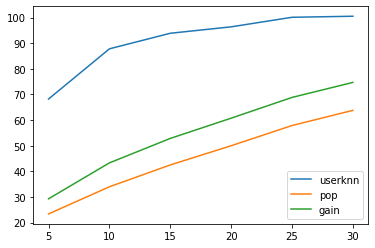

In [11]:
K = results["K"]
method = "userknn"
avg_pr_secure = results["pr_below_" + method]
plt.plot(K, avg_pr_secure, label=method)

method = "pop"
avg_pr_secure = results["pr_below_" + method]
plt.plot(K, avg_pr_secure, label=method)

method = "gain"
avg_pr_secure = results["pr_below_" + method]
plt.plot(K, avg_pr_secure, label=method)

plt.legend()

In [ ]:
def print_results(results, method, k):
    idx = 1#np.where(results["K"] == k)[0][0]
    n_vulnerables = np.array(results["vulnerables_" + method])[idx]
    n_secures = np.array(results["secures_" + method])[idx]
    n_users = n_secures + n_vulnerables
    avg_pr_vulnerables = results["pr_above_" + method][idx]
    avg_pr_secure = results["pr_below_" + method][idx]
    avg_nq_vulnerables = results["nq_above_" + method][idx]
    avg_nq_secure = results["nq_below_" + method][idx]
    
    print("[" + method + "] Avg. PR Secure / Frac. Secure: %f / %f" % (avg_pr_secure, n_secures / n_users))

results = load_data(name="ml-100k", protected=True)
print_results(results, "userknn_full", k=10)
print_results(results, "userknn_no", k=10)
print()
print_results(results, "userknn", k=10)
print_results(results, "pop", k=10)
print_results(results, "gain", k=10)
print()
print_results(results, "userknn_reuse", k=10)
print_results(results, "pop_reuse", k=10)
print_results(results, "gain_reuse", k=10)